In [1]:
import os
import zipfile

In [2]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
#    -O /tmp/horse-or-human.zip

#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
#    -O /tmp/validation-horse-or-human.zip
  
imgdir = 'F:/coursera/TensorflowInPractice/images'
local_zip = imgdir + '/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = imgdir + '/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [3]:
import tensorflow as tf

C:\Users\chenxy\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 45s 6s/step - loss: 0.7089 - acc: 0.4750 - val_loss: 0.6669 - val_acc: 0.8828
Epoch 2/100
8/8 [==============================] - 43s 5s/step - loss: 0.6784 - acc: 0.6274 - val_loss: 0.6812 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 48s 6s/step - loss: 0.6730 - acc: 0.5596 - val_loss: 0.6359 - val_acc: 0.5312
Epoch 4/100
8/8 [==============================] - 39s 5s/step - loss: 0.6551 - acc: 0.6344 - val_loss: 0.6849 - val_acc: 0.5000
Epoch 5/100
8/8 [==============================] - 43s 5s/step - loss: 0.6237 - acc: 0.6652 - val_loss: 0.5533 - val_acc: 0.7109
Epoch 6/100
8/8 [==============================] - 43s 5s/step - loss: 0.5967 - acc: 0.6841 - val_loss: 0.6321 - val_acc: 0.5352
Epoch 7/100
8/8 [==============================] - 42s 5s/step - loss: 0.5778 - acc: 0.7253 - val_loss: 0.5150 - val_acc: 0.7031
Epoch 8/100
8/8 [==============================] - 48s 6s/step - loss: 0.5355 - acc: 0.7314 - val

8/8 [==============================] - 43s 5s/step - loss: 0.1588 - acc: 0.9355 - val_loss: 2.5150 - val_acc: 0.5703
Epoch 65/100
8/8 [==============================] - 48s 6s/step - loss: 0.2184 - acc: 0.9170 - val_loss: 1.8793 - val_acc: 0.6367
Epoch 66/100
8/8 [==============================] - 40s 5s/step - loss: 0.1836 - acc: 0.9109 - val_loss: 1.8702 - val_acc: 0.6367
Epoch 67/100
8/8 [==============================] - 48s 6s/step - loss: 0.1759 - acc: 0.9414 - val_loss: 1.0373 - val_acc: 0.7305
Epoch 68/100
8/8 [==============================] - 44s 6s/step - loss: 0.1938 - acc: 0.9299 - val_loss: 2.4672 - val_acc: 0.5781
Epoch 69/100
8/8 [==============================] - 43s 5s/step - loss: 0.1716 - acc: 0.9255 - val_loss: 1.6414 - val_acc: 0.6719
Epoch 70/100
8/8 [==============================] - 40s 5s/step - loss: 0.1528 - acc: 0.9225 - val_loss: 3.5503 - val_acc: 0.5117
Epoch 71/100
8/8 [==============================] - 49s 6s/step - loss: 0.1762 - acc: 0.9297 - val_loss

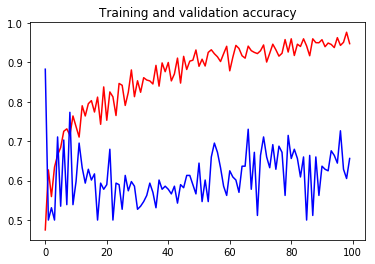

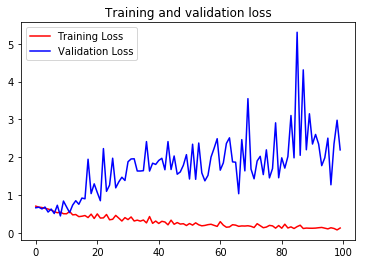

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()